# **Financial Theory (FIN42000)**

---------------

<br>

## **Group Assignment - 3**

## Due: 9th December 2022

## Instructor: Prof. David Edelman

<br>

------------

### **Group 23**

#### **Members:**

####  •	Hussein Mohamed Hassib Abbas

#### •	Spandan Banerjee

#### •	Gavin Connolly

#### •	Thomas Fenton

#### •	Shreyas Vikram Kartha

<br>

--------------

In [1]:
using Plots
using Ipopt
using JuMP
using Printf

---------------

# **Chapter 3 - Utility**

------------
**4**

Assume that you have a logarithmic utility function for wealth U(W) = ln(W) and that you are faced with a 50/50 chance of winning or losing \\$1,000. 
How much will you pay to avoid risk if your current level of wealth is \$10,000?

Want expectation of each investment to be equal.

$E[U(10000-x)] = log(10000-x) = E[log(10000+\tilde{b})] = 0.5\cdot log(9000) + 0.5\cdot log(11000)$

$\implies 10000-x = e^{0.5\cdot log(9000) + 0.5\cdot log(11000)} = 9949.8744$

$\implies x = 50.1256$

Investor would pay \\$50.1256 to avoid facing gamble.

--------------
How much would you pay if your level of wealth were \\$1,000,000?

$E[U(1000000-x)] = log(1000000-x) = E[log(1000000+\tilde{b})] = 0.5\cdot log(999000) + 0.5\cdot log(1001000)$

$\implies 1000000-x = e^{0.5\cdot log(999000) + 0.5\cdot log(1001000)} = 999999.5$

$\implies x = 0.50$

Investor would invest \\$0.50 to avoid facing gamble.

-------------
**5**

Given the exponential utility function $U(W) =−e^{−aW}$:

**(a)** Graph the function, assuming a > 0.

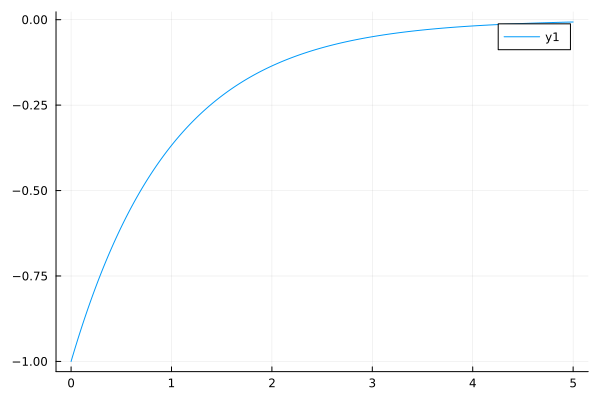

In [2]:
W = 0:0.01:5
a=1
plot(W, -exp.(-a*W))

-----------
**(b)** Does the function exhibit positive marginal utility and risk aversion?

$\frac{dU}{dW} = a \cdot e^{aW} > 0$

Implies positive marginal utility.

$\frac{d^2U}{dW^2} = -a^2 \cdot e^{aW} < 0$

Implies risk-aversion.

---------
**(c)** Does the function have decreasing absolute risk aversion?

$ARA(W) = \frac{U''(W)}{U'(W)} = \frac{a^2e^{-aW}}{ae^{-aW}} = a$

Implies constant absolute risk-aversion (non-decreasing).

-----------
**(d)** Does the function have constant relative risk aversion?

$RRA(W) = W\cdot ARA(W) = W\cdot a$

Implies variable relative risk-aversion (non-constant).

------------------
**9**

If you are exposed to a 50/50 chance of gaining or losing \\$1,000 and insurance that removes the risk costs \$500,
at what level of wealth will you be indifferent relative to taking the gamble or paying the insurance?

That is, what is your certainty equivalent wealth?

Assume your utility function is $U(W) = −W^{−1}$

In [1]:
model=Model(Ipopt.Optimizer)
@variable(model,W>=0)
@NLconstraint(model, W-(-((-.5*(W+1000)^-1)+.5*(-(W-1000)^-1))^-1)==500)
set_silent(model)
optimize!(model)

value.(W)

LoadError: UndefVarError: Ipopt not defined

Our certainty equivalent wealth is \$2000

----------------------
**13** Given the following probability distributions for risky assets X and Y :

| Probabiliy $X_i$ | $X_i$ | Probabiliy $Y_i$ | $Y_i$ |
| --- | --- | --- | --- |
| 0.1 | -10 | 0.2 | 2 |
| 0.4 | 5 | 0.5 | 3 |
| 0.3 | 10 | 0.2 | 4 |
| 0.2 | 12 | 0.1 | 30 |

**(a)** If the only available choice is 100% of your wealth in X or 100% in Y and you choose
on the basis of mean and variance, which asset is preferred?

In [4]:
pX = [0.1 0.4 0.3 0.2]
X = [-10 5 10 12]
pY = [0.2 0.5 0.2 0.1]
Y = [2 3 4 30]

EX = pX*X'
varX = pX*X'.^2-EX^2

EY = pY*Y'
varY = pY*Y'.^2-EY^2

@printf("Expected value of X: %0.1f \n", EX[1])
@printf("Variance of X: %0.2f \n", varX[1])
@printf("Expected value of Y: %0.1f \n", EY[1])
@printf("Variance of Y: %0.2f \n", varY[1])

Expected value of X: 6.4 
Variance of X: 37.84 
Expected value of Y: 5.7 
Variance of Y: 66.01 


Asset X is preferred based on mean & variance, as it provides a greater expected return with a lower variance.

----------------
**(b)** According to the second-order stochastic dominance criterion, how would you compare
them?

According to the second-order stochastic dominance criterion we compare the CDFs of each of the payoffs:

In [5]:
ind=-10:0.1:31;
cdf_x = zeros(length(ind));
cdf_y= zeros(length(ind));

In [6]:
for i in 1:length(ind)
    if ind[i] > -10
        cdf_x[i] = 0.1
    end
    if ind[i] > 5
        cdf_x[i] += 0.4
    end
    if ind[i] > 10
        cdf_x[i] += 0.3
    end
    if ind[i] > 12
        cdf_x[i] += 0.2
    end
end

for i in 1:length(ind)
    if ind[i] > 2
        cdf_y[i] = 0.2
    end
    if ind[i] > 3
        cdf_y[i] += 0.5
    end
    if ind[i] > 4
        cdf_y[i] += 0.2
    end
    if ind[i] > 30
        cdf_y[i] += 0.1
    end
end

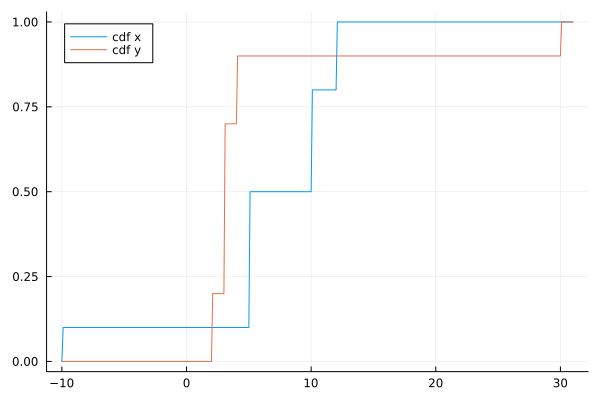

In [7]:
plot(ind, [cdf_x cdf_y], label = ["cdf x" "cdf y"])
plot!(legend = :topleft)

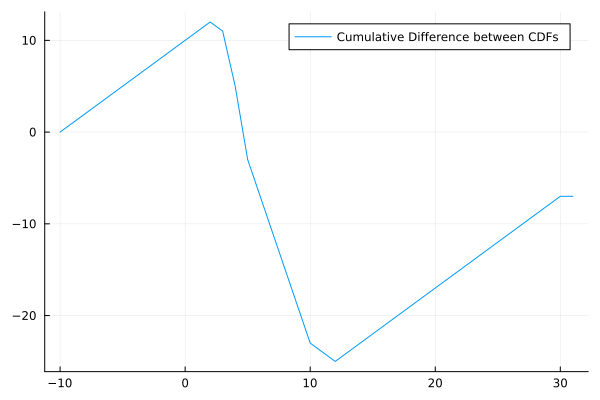

In [8]:
plot(ind, cumsum(cdf_x-cdf_y), label = "Cumulative Difference between CDFs")

As the cumulative sum of differences between the CDFs of each investment are neither strictly negative nor strictly positive, we do not have 2nd-order stochastic dominance in this scenario. The comparison is therefore inconclusive.

----------

# Chapter 4 - State Preference Theory


--------------
**1**

Security A pays \\$30 if state 1 occurs and \$10 if state 2 occurs. 

Security B pays \\$20 if state 1 occurs and \$40 if state 2 occurs.

The price of security A is \\$5, and the price of security B is \$10.


**(a)** Set up the payoff table for securities A and B.

| Security | State 1 | State 2 | Price |
| --- | --- | --- | --- |
| A | 30 | 10 | 5 |
| B | 20 | 40 | 10 |

------------
**(b)** Determine the prices of the two pure securities.



In [9]:
Price = [5 10]'
Payoff = [30 10; 20 40]
Pure_Price = inv(Payoff)*Price
Pure_Price'

1×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.1  0.2

**Pure Security Price of State 1:** \\$0.10

**Pure Security Price of State 2:** \\$0.20

---------------
**6.** 
Suppose that there are only two possible future states of the world, and the utility function is logarithmic.
Let the probability of state 1, $π_1$, equal $\frac{2}{3}$, and the prices of the pure securities, $p_1$ and $p_2$, equal \\$0.60 and \\$0.40, respectively. An individual has an initial wealth or endowment, $W_0$, of \\$50,000.

**(a)** What amounts will the risk-averse individual invest in pure securities 1 and 2?

In [10]:
# Maximise log wealth subject to wealth constraint
opt=Model(Ipopt.Optimizer)
@variable(opt, Q[1:2]>=0)
@constraint(opt, Q[1]*0.6+Q[2]*0.4<=50000)
@NLobjective(opt, Max, log(50000-0.6*Q[1]-0.4*Q[2])+2/3*log(Q[1])+1/3*log(Q[2]))
set_silent(opt)
optimize!(opt)

In [11]:
value.(Q)

2-element Vector{Float64}:
 27777.385298464604
 20833.77887065368

In [12]:
value.(Q).*[0.6 0.4]'

2×1 Matrix{Float64}:
 16666.43117907876
  8333.511548261473

A risk-averse investor would invest \\$16666.4312 in pure security 1 & \$8333.5115 in pure security 2

-------------
**(b)** How will the individual divide his or her initial endowment between current and future
consumption?

**Current Consumption:** 50000-16666.43-8333.51 = \$25,000.06

So an investor will split their wealth equally between current & future consumption.

# Extra Group question

Stocks A, B, and C have prices 13.00, 29.00, and 18.40 and the state-contingent payoffs are as given in the table below:

  | Stock |  State 1 | State 2 | State 3 |
  | --- | --- | --- | --- |
  | A | 10| 10| 20 |
  | B | 20 | 30 | 40 |
  | C | 15 | 18 | 25 |

If the utility function for early consumption is $u(C)=\sqrt{C}$ and for 
  end-of-period consumption is $U(Q_s)=.9*\sqrt{Q_s}$ (for pure states $Q_1$,
  $Q_2$, and $Q_3$), find the optimal allocations to early consumption $C$ and late consumption $\{Q_s\}$ if the budget for total consumption is €10,000.   
  
  

In [13]:
Payoff = [10 10 20; 20 30 40; 15 18 25]
Price = [13 29 18.4]
Pure_Price = inv(Payoff)*Price'

sum_Pure_Prices = [1 1 1]*Pure_Price
# Sum of pure prices is 0.9 so renormalising will cancel the 0.9 in the EOP-consumption

1×1 Matrix{Float64}:
 0.8999999999999999

In [14]:
# Maximise utility subject to wealth constraint
opt=Model(Ipopt.Optimizer)
@variable(opt, Q[1:3]>=0)
@variable(opt, C>=0)
@constraint(opt, C+Price[1]*Q[1]+Price[2]*Q[2]+Price[3]*Q[3]==10000)
@NLobjective(opt, Max, sqrt(C)+
    (Pure_Price[1]*sqrt(Q[1])+Pure_Price[2]*sqrt(Q[2])+Pure_Price[3]*sqrt(Q[3])))
set_silent(opt)
optimize!(opt)

In [15]:
value.(Q)

3-element Vector{Float64}:
 1.782630877261564
 0.7727413420885013
 3.7559428525101173

In [16]:
# Get Early Consumption
value.(C)

9885.306951188846

In [17]:
# Calculate End-of-Period Consumption
Price.*value.(Q)'*[1 1 1]'

1×1 Matrix{Float64}:
 114.69304881115302

**Total early consumption:** €9885.307

**Total end-of-period consumption:** €114.693